Ta dùng thuật toán K-means để làm việc với dữ liệu đầu vào không có nhãn, khi cần ***phân cụm dữ liệu*** căn cứ trên 1 điểm nào đó. Clustering nghĩa là phân cụm, bó lại, buộc, túm lại.

Khi nào dùng K-means: 

1. Ta không có nhãn.
2. Chỉ dựa trên feature của dữ liệu để cố gắng phân cụm.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sinh ra dữ liệu giả, để tiện thực hành
cum1 = np.random.normal( loc=(1,1), scale=(1,1), size=(20,2))
cum2 = np.random.normal( loc=(5,5), scale=(1,1), size=(20,2))
cum3 = np.random.normal( loc=(8,9), scale=(1,1), size=(20,2))
X = np.concatenate((cum1, cum2, cum3), axis=0)

print(X)
print(X.shape)

[[ 2.37614096  1.09831149]
 [-0.60562038  1.34267348]
 [ 0.96909088  1.42745808]
 [ 0.52542924  0.24861985]
 [ 1.70008306  2.60098175]
 [ 0.29198767 -0.85976262]
 [ 3.10810016  1.63481562]
 [ 0.35419227  0.64931032]
 [ 0.6954443   1.62406832]
 [-0.32117722  1.75000461]
 [ 2.27658966  3.93532701]
 [ 0.73512999  2.63313935]
 [ 2.09929545 -1.18525135]
 [ 0.55763647  0.96967549]
 [ 1.46861697  1.62526852]
 [ 1.66730505 -0.38733554]
 [ 1.09959852 -0.28056303]
 [ 0.79329121  0.31618321]
 [ 2.79759304  2.17825156]
 [ 1.6517527   1.47851631]
 [ 4.35134317  4.36342586]
 [ 4.89134501  3.25090894]
 [ 5.47054338  4.9898933 ]
 [ 5.27092361  5.13542101]
 [ 6.47778624  3.00390378]
 [ 5.76170241  6.08369376]
 [ 3.91539193  5.25025257]
 [ 5.24861422  5.91813103]
 [ 4.97702655  5.30697348]
 [ 3.29617249  3.38331516]
 [ 6.09598892  4.99865221]
 [ 5.34259554  6.14538936]
 [ 6.66931909  4.6989676 ]
 [ 5.59410978  4.91832934]
 [ 5.07803835  3.60466378]
 [ 4.44969224  5.00691551]
 [ 4.78921988  6.0623715 ]
 

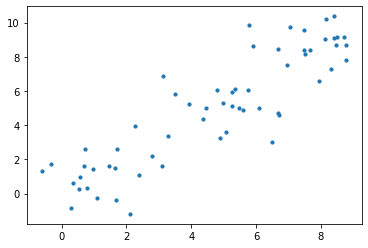

In [ ]:
# Lúc này chưa biết bao nhiêu cụm k
plt.scatter(X[:, 0], X[:, 1], s=10) # s = size

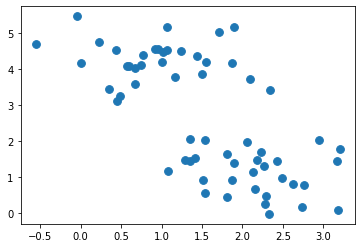

In [ ]:
# Method 1: using sklearn
# Vẽ xem dữ liệu giả sinh ra phân bố thế nào
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=60, centers=2, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=60);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

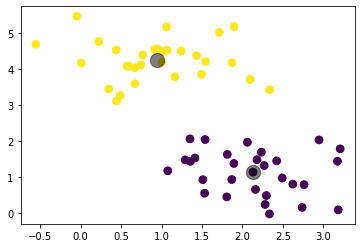

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# xi = np.array([2,3])
# centroids = np.array([[1,2], [3,4], [5,6]])
# dis = np.sqrt(np.sum((xi-centroids)**2, axis=1))
# print(dis)
# dis_min = np.argmin(dis)
# print(dis_min)
# def assign_labels_for_X(X, centroids):
#     return np.array([assign_label_xi(xi, centroids) for xi in X])
# assign_labels_for_X(X, centroids)
#xi_centroids

In [ ]:
# Test this function
def assign_label_xi(xi, centroids):
    xi_centroids = np.sqrt(np.sum((xi-centroids)**2,axis = 1))
    return np.argmin(xi_centroids)
xi = np.array([2,3])
centroids = np.array([[1,2],[3,4],[5,6]])
xi_centroids = np.sqrt(np.sum((xi-centroids)**2,axis = 1))
xi_centroids
xi_centroids_min = np.argmin(xi_centroids)
print(xi_centroids_min)
Y = np.array([assign_label_xi(xi, centroids) for xi in X])
print(Y)

0
[0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0]


[0 4 4 4 4 0 0 0 0 0 0 4 0 4 4 4 0 4 0 0 4 4 4 4 0 4 4 4 4 4 0 0 0 4 4 4 0
 4 0 0 0 4 0 4 4 4 0 0 0 0 0 4 0 4 4 0 0 4 0 0]


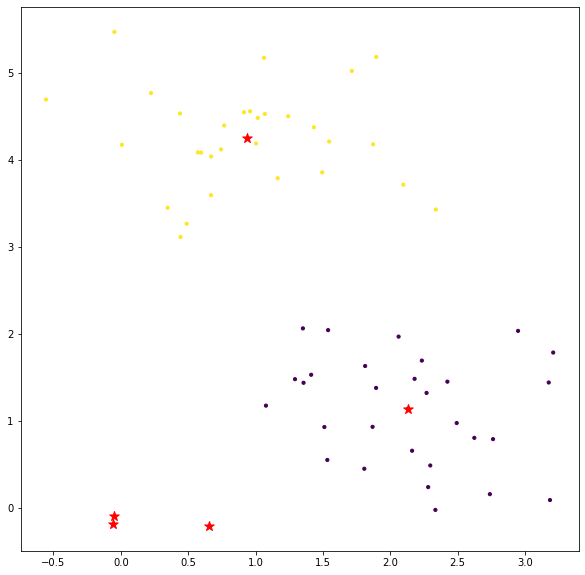

In [ ]:
# Method 2: not using sklearn
#input: 
# - xi là 1 điểm dữ liệu. Kích thước (2,)
# - centroids là bộ k centroid. Kích thước (k,2) 
#output: 
# - nhãn, cũng chính là số thứ tự (scalar) của chính centroid trong bộ centroid
def assign_label_xi(xi, centroids):
    xi_centroids = np.sqrt(np.sum((xi-centroids)**2, axis=1)) # tính distances từ 1 điểm xi tới tất cả centroids # ra 5 distances từ xi đến 5 centroids (khoảng cách của 1 điểm tới tất cả centroids)
    return np.argmin(xi_centroids)# tính min distance, vị trí của điểm gần centroid nhất) 
#input: 
# - X: tập dữ liệu. Kích thước (len(X),2)
# - centroids: bộ k centroid. Kích thước (k,2)
#out: 
# - bộ các nhãn có giá trị 0,1,2...(k-1). Kích thước (len(X),)
def assign_labels_for_X(X, centroids):
    return np.array([assign_label_xi(xi, centroids) for xi in X])

#input:
# - X: tập dữ liệu. Kích thước (60,2)
# - labels: bộ các nhãn có giá trị 0,1,2...(k-1). Kích thước (60,)
# - centroids_old: bộ k centroid được khởi tạo ban đầu. Kích thước (k,2)
#output: 
# - bộ centroid mới đã được cập nhật xong. Kích thước (k,2)

def calculate_centroids(X):
    return np.mean(X, axis=0)

def update_centroids(X, labels, centroids_old):
    # Bộ k centroid có tương ứng bộ k nhãn: 0,1...(k-1)

    # Với mỗi nhãn từ 0->(k-1), coi thử có điểm nào thuộc nhãn đó không
    # - nếu không: trả về toạ độ của centroid cũ
    # - nếu có: tính lại toạ độ của centroid mới (dùng np.mean với axis=0)
    size = len(centroids_old)
    new_centroids = []
    for l in range(size):
        if l in labels:
            new_centroids.append(calculate_centroids(X[labels==l]))
        else:
            new_centroids.append(centroids_old[l])
    # new_centroids = [calculate_centroids(X[labels==l]) 
    #                 if l in labels else centroids_old[l] for l in range(size)] # Method 2

    return np.array(new_centroids)

def Kmean(X, k_centroid, epoch):
    # chọn/sinh ngẫu nhiên k centroid ứng với k cụm
    centroids = np.random.randn(k_centroid, 2)
    # vì ban đầu ta chưa biết dữ liệu thuộc cụm nào nên ta tạm thời gán nhãn cho tất cả điểm dữ liệu là 0. Kích thước (len(X),2)
    labels = np.array([0]*len(X)) # 60 con số 0 do 60 dữ liệu

    # thực thi giải thuật Kmeans ở đây
    for i in range(epoch):
        labels = assign_labels_for_X(X, centroids)
        centroids = update_centroids(X, labels, centroids)

    return centroids, labels

if __name__ == "__main__":
  epoch =10
  k = 5
  centroids, labels = Kmean(X, k, epoch)
  print(labels)
  plt.figure(figsize=(10, 10))
  plt.scatter(X[:,0], X[:,1], c=labels, s=10)
  plt.scatter(centroids[:,0], centroids[:,1], c='red', s=100, marker='*')
  plt.show()

[2 0 0 0 0 4 2 2 4 4 2 0 4 0 0 0 2 0 2 2 0 0 0 0 4 0 0 0 0 0 2 4 2 0 0 0 4
 0 2 4 4 0 4 0 0 0 4 2 4 2 2 0 2 0 0 4 4 0 4 4]


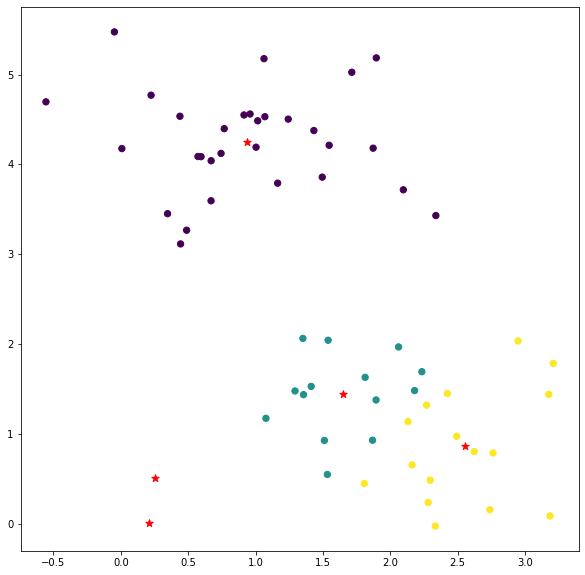

In [ ]:
#input: 
# - xi là 1 điểm dữ liệu. Kích thước (2,)
# - centroids là bộ k centroid. Kích thước (k,2) 
#output: 
# - nhãn, cũng chính là số thứ tự (scalar) của chính centroid trong bộ centroid
def assign_label_xi(xi, centroids):
    xi_centroids = np.sqrt(np.sum((xi-centroids)**2,axis = 1))
    return np.argmin(xi_centroids)
#input: 
# - X: tập dữ liệu. Kích thước (len(X),2)
# - centroids: bộ k centroid. Kích thước (k,2)
#out: 
# - bộ các nhãn có giá trị 0,1,2...(k-1). Kích thước (len(X),)
def assign_labels_for_X(X, centroids):
    return np.array([assign_label_xi(xi, centroids) for xi in X])
#input:
# - X: tập dữ liệu. Kích thước (60,2)
# - labels: bộ các nhãn có giá trị 0,1,2...(k-1). Kích thước (60,)
# - centroids_old: bộ k centroid được khởi tạo ban đầu. Kích thước (k,2)
#output: 
# - bộ centroid mới đã được cập nhật xong. Kích thước (k,2)
def calculate_centroid(X):
    return np.mean(X,axis=0)
def update_centroids(X, labels, centroids_old):
    # Bộ k centroid có tương ứng bộ k nhãn: 0,1...(k-1)
    size = len(centroids_old)
    # Với mỗi nhãn từ 0->(k-1), coi thử có điểm nào thuộc nhãn đó không
    # - nếu không: trả về toạ độ của centroid cũ
    # - nếu có: tính lại toạ độ của centroid mới
    #cách 1
    new_centroids = []
    for l in range(size):
        if l in labels:
            new_centroids.append(calculate_centroid(X[labels ==l]))
        else:
            new_centroids.append(centroids_old[l])
    return np.array(new_centroids)
    #cách 2
    # new_centroids = [calculate_centroid(X[labels ==l]) if i in labels else centroids_old[l] for l in range(size)]
def Kmean(X, k_centroid, epoch):
    # chọn/sinh ngẫu nhiên k centroid ứng với k cụm
    centroids = np.random.rand(k_centroid, 2)
    # vì bạn đầu ta chưa biết dữ liệu thuộc cụm nào nên ta tạm thời gán nhãn cho tất cả điểm dữ liệu là 0. Kích thước (len(X),2)
    labels = np.array([0]*len(X))
    # thực thi giải thuật Kmeans ở đây
    for i in range(epoch):
        labels = assign_labels_for_X(X, centroids)
        centroids = update_centroids(X, labels, centroids)
    return centroids, labels
if __name__ == "__main__":
  epoch =10
  k = 5
  centroids, labels = Kmean(X, k, epoch)
  print(labels)
  plt.figure(figsize=(10,10))
  plt.scatter(X[:,0], X[:,1], c=labels, s=40)
  plt.scatter(centroids[:,0], centroids[:,1], c='red', s=60, marker='*')
  plt.show()